# 🎓 **Maestría en Inteligencia Artificial Aplicada**

## 📈 **Curso: Análisis de grandes volúmenes de datos (Gpo 10)**

### 🏛️ Tecnológico de Monterrey

#### 👨‍🏫 **Profesor titular:** Dr. Iván Olmos Pineda
#### 👩‍🏫 **Profesor asistence:** Verónica Sandra Guzmán de Valle

### 📊 **Actividad 3 | Aprendizaje supervisado y no supervisado**

#### 📅 **22 de mayo de 2025**

🧑‍💻 **A01016093:** Oscar Enrique García García 

# 1. Introducción teórica

# 🤖 Tipos de Modelos de Machine Learning

Los modelos de Machine Learning se dividen en dos grandes categorías: **aprendizaje supervisado** y **aprendizaje no supervisado**, dependiendo de si los datos usados para entrenar el modelo están etiquetados o no.

---

## 🕵️‍♂️ Aprendizaje Supervisado

En el aprendizaje supervisado, el modelo se entrena con un conjunto de datos **etiquetado**, es decir, cada ejemplo incluye una **entrada (features)** y una **salida esperada (label)**. El objetivo es que el modelo **aprenda una función de mapeo** que pueda generalizar y predecir salidas para nuevas entradas.

### 🔍 Tipos de problemas

- **Clasificación:** Predecir una categoría o clase (por ejemplo, detectar si una transacción es fraudulenta).
- **Regresión:** Predecir un valor numérico continuo (por ejemplo, el precio de una vivienda).

### ✅ Algoritmos representativos en PySpark

| Algoritmo                     | Clasificación (`Classifier`)           | Regresión (`Regressor`)             |
|------------------------------|----------------------------------------|-------------------------------------|
| Regresión lineal/logística   | `LogisticRegression`                   | `LinearRegression`                  |
| Árboles de decisión          | `DecisionTreeClassifier`               | `DecisionTreeRegressor`            |
| Random Forest                | `RandomForestClassifier`               | `RandomForestRegressor`            |
| Gradient Boosted Trees       | `GBTClassifier`                        | `GBTRegressor`                     |
| Naive Bayes                  | `NaiveBayes` (solo clasificación)      | -                                   |
| Redes neuronales multicapa  | `MultilayerPerceptronClassifier`       | -                                   |

---

## 🙈 Aprendizaje No Supervisado

En el aprendizaje no supervisado, el modelo **no tiene salidas conocidas**. El objetivo es descubrir **estructuras, patrones o agrupamientos** ocultos en los datos.

### 🔍 Tipos de problemas

- **Agrupamiento (Clustering):** Identificar grupos o segmentos similares dentro de los datos.
- **Reducción de dimensionalidad:** Reducir el número de variables manteniendo la información relevante.
- **Detección de anomalías:** Identificar observaciones inusuales o fuera de lo común.

### ✅ Algoritmos representativos en PySpark

| Técnica                      | Algoritmo                             | Clase en PySpark                   |
|-----------------------------|----------------------------------------|------------------------------------|
| Clustering (agrupamiento)   | K-Means                                | `KMeans`                           |
|                             | Gaussian Mixture Model (GMM)           | `GaussianMixture`                 |
|                             | Bisecting K-Means                      | `BisectingKMeans`                 |
|                             | Power Iteration Clustering (PIC)       | `PowerIterationClustering`        |
| Detección de anomalías      | Isolation Forest (en versión experimental/extensión) | -                        |
| Reducción de dimensionalidad| Principal Component Analysis (PCA)     | `PCA`                              |
|                             | Truncated SVD (en pipelines)           | `TruncatedSVD`                     |

---

## 📦 Librerías de Machine Learning en PySpark

### 🔧 PySpark MLlib (legacy)

- La librería original de Spark para ML.
- Basada en RDDs (Resilient Distributed Datasets).
- Actualmente **desaconsejada** para nuevos proyectos.

### ✅ PySpark ML (recomendada)

- Basada en `DataFrames` (más parecidos a pandas).
- Facilita la construcción de pipelines con `Transformer` y `Estimator`.
- Mejor optimización y paralelización.
- Compatible con APIs de Spark SQL.
- Incluye clases como `Pipeline`, `VectorAssembler`, `StringIndexer`, etc.




# 2. Importar librerías

In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.ml.feature import Imputer
from pyspark.sql.functions import col, count, when, isnan, desc, lit
import matplotlib.pyplot as plt
from pyspark.sql import functions as F

# 3. Crear sesión de Spark y lectura de archivo

In [2]:
spark = SparkSession.builder \
    .appName("Aprendizaje Supervisado y No Supervisado") \
    .getOrCreate()


25/05/25 13:26:45 WARN Utils: Your hostname, MacBook-Air-de-Oscar-2.local resolves to a loopback address: 127.0.0.1; using 192.168.68.117 instead (on interface en0)
25/05/25 13:26:45 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/05/25 13:26:46 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
df = spark.read.csv("/Users/oscgarcia/Documents/MNA/Análisis de Grandes Volúmenes de Datos/US_Accidents_Dec19.csv", header=True, inferSchema=True)
df.show(5)

25/05/25 13:27:00 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors
25/05/25 13:27:01 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+---+-------+--------+-------------------+-------------------+-----------------+------------------+-------+-------+------------+--------------------+--------------------+------------+----------+-----+----------+-------+----------+------------+-------------------+--------------+-------------+-----------+------------+--------------+--------------+---------------+-----------------+-----------------+-------+-----+--------+--------+--------+-------+-------+----------+-------+-----+---------------+--------------+------------+--------------+--------------+-----------------+---------------------+
| ID| Source|Severity|         Start_Time|           End_Time|        Start_Lat|         Start_Lng|End_Lat|End_Lng|Distance(mi)|         Description|              Street|        City|    County|State|   Zipcode|Country|  Timezone|Airport_Code|  Weather_Timestamp|Temperature(F)|Wind_Chill(F)|Humidity(%)|Pressure(in)|Visibility(mi)|Wind_Direction|Wind_Speed(mph)|Precipitation(in)|Weather_Condition|Ameni

Se decidió mantener únicamente las siguientes columnas ya que, como lo mencionamos en el documento del proyecto, el estudio se centraba en evaluar cómo afectaban las condiciones meteorológicas, a la severidad de los accidentes: Temperature(F), Weather_Condition, Severity, Humidity(%), Pressure(in), Wind_Direction, Wind_Speed(mph), Precipitation(in).

In [4]:
cols_to_select = ["Temperature(F)","Weather_Condition","Severity",
               "Humidity(%)", "Pressure(in)", "Wind_Direction",
               "Wind_Speed(mph)","Precipitation(in)"] #Se definen las columnas a mantener.

df = df.select(cols_to_select) #Se seleccionan únicamente las columnas definidas en el paso anterior.
df.show()

+--------------+-----------------+--------+-----------+------------+--------------+---------------+-----------------+
|Temperature(F)|Weather_Condition|Severity|Humidity(%)|Pressure(in)|Wind_Direction|Wind_Speed(mph)|Precipitation(in)|
+--------------+-----------------+--------+-----------+------------+--------------+---------------+-----------------+
|          36.9|       Light Rain|       3|       91.0|       29.68|          Calm|           NULL|             0.02|
|          37.9|       Light Rain|       2|      100.0|       29.65|          Calm|           NULL|              0.0|
|          36.0|         Overcast|       2|      100.0|       29.67|            SW|            3.5|             NULL|
|          35.1|    Mostly Cloudy|       3|       96.0|       29.64|            SW|            4.6|             NULL|
|          36.0|    Mostly Cloudy|       2|       89.0|       29.65|            SW|            3.5|             NULL|
|          37.9|       Light Rain|       3|       97.0| 

# 4. Particionamiento

A continuación, se enlistan las particiones previamente definidas en el documento del proyecto y se integra el código para obtener muestras de tamaño "n", para cada una de las particiones. En este caso, se seleccionaron 10,000 registros para cada una de las particiones.

In [5]:
reglas_particionamiento = [
    {"Weather_Condition": "Fair", "Severity": 2},
    {"Weather_Condition": "Mostly Cloudy", "Severity": 2},
    {"Weather_Condition": "Cloudy", "Severity": 2},
    {"Weather_Condition": "Partly Cloudy", "Severity": 2},
    {"Weather_Condition": "Clear", "Severity": 2},
    {"Weather_Condition": "Light Rain", "Severity": 2},
    {"Weather_Condition": "Overcast", "Severity": 2},
    {"Weather_Condition": "Clear", "Severity": 3},
    {"Weather_Condition": "Fair", "Severity": 3},
    {"Weather_Condition": "Mostly Cloudy", "Severity": 3},
] #Se enlistan las particiones elegidas en el documento del proyecto.

muestras = [] #Se crea una lista vacía, que guardará las muestras.
tamaño_muestra_por_particion = 10000 #Se define el tamaño de la muestra (para cada partición).

for regla in reglas_particionamiento: #Se recorre la lista de reglas de particionamiento.
    condicion_clima = regla["Weather_Condition"]
    severidad = regla["Severity"]

    df_filtrado = df.filter(
        (col("Weather_Condition") == condicion_clima) &
        (col("Severity") == severidad)
    ).limit(tamaño_muestra_por_particion) #Se filtran los primeros n registros (tamaño de la muestra), que cumpla con las condiciones estipuladas en las reglas de particionamiento.

    muestras.append(df_filtrado) #Se agregan los datos a la lista de muestras

df_muestra_M = muestras[0]
for df_temp in muestras[1:]:
    df_muestra_M = df_muestra_M.union(df_temp) #Se unen todas las muestras en un solo dataframe.

df_muestra_M.show(5)


+--------------+-----------------+--------+-----------+------------+--------------+---------------+-----------------+
|Temperature(F)|Weather_Condition|Severity|Humidity(%)|Pressure(in)|Wind_Direction|Wind_Speed(mph)|Precipitation(in)|
+--------------+-----------------+--------+-----------+------------+--------------+---------------+-----------------+
|          87.0|             Fair|       2|       35.0|       29.11|           SSE|            8.0|              0.0|
|          94.0|             Fair|       2|       31.0|       29.08|           SSE|            9.0|              0.0|
|          85.0|             Fair|       2|       44.0|       29.07|             S|           10.0|              0.0|
|          85.0|             Fair|       2|       44.0|       29.07|             S|           10.0|              0.0|
|          85.0|             Fair|       2|       44.0|       29.07|             S|           10.0|              0.0|
+--------------+-----------------+--------+-----------+-

In [6]:
df_muestra_M.count() #Se verifica que existan 100,000 registros, que es el resultado de multiplicar el tamaño de la muestra (10,000) por el número de particiones (10).

100000

In [7]:
df_muestra_M.printSchema() #Se verifica el esquema del dataframe resultante.

root
 |-- Temperature(F): double (nullable = true)
 |-- Weather_Condition: string (nullable = true)
 |-- Severity: integer (nullable = true)
 |-- Humidity(%): double (nullable = true)
 |-- Pressure(in): double (nullable = true)
 |-- Wind_Direction: string (nullable = true)
 |-- Wind_Speed(mph): double (nullable = true)
 |-- Precipitation(in): double (nullable = true)



# 5. Preparación de los datos

A continuación, se definen estrategias de imputación de valores nulos, dependiendo del tipo de dato de cada una de las columnas.

Para las variables numéricas, se optó por imputar la mediana; mientras que para las variables categóricas (en este caso es una sola: Wind Direction), se optó por imputar la moda.

In [8]:
cols = ["Temperature(F)", "Humidity(%)", "Pressure(in)", "Precipitation(in)","Wind_Speed(mph)"] #Se definen las columnas a las que se les aplicará la transformación
imputed_cols = [f"{c}_imputed" for c in cols] #Se definen los nombres de las columnas a las que se les aplicará la transformación (imputar la media en valores nulos).

imputer = Imputer(
    inputCols=cols,
    outputCols=imputed_cols
).setStrategy("median") #Se definen las columnas a las que se les aplicará la transformación

df_imputed = imputer.fit(df_muestra_M).transform(df_muestra_M) #Se aplica la transformación (imputar la media en valores nulos) a las columnas previamente definidas.

for orig, imp in zip(cols, imputed_cols):
    df_imputed = df_imputed.drop(orig).withColumnRenamed(imp, orig)


In [9]:
# Calcular la moda de 'Weather_Condition'
mode_wind_dir = df_imputed.groupBy("Wind_Direction").count().orderBy(desc("count")).first()[0]

# Reemplazar valores nulos en 'Weather_Condition' con la moda
df_imputed = df_imputed.fillna({"Wind_Direction": mode_wind_dir})


Una vez aplicadas las transformaciones anteriores, se procede con los siguientes pasos:

1. Eliminar los registros que presenten nulos en las columnas restantes: Weather_Condition y Severity.

2. Convertir las variables categóricas a valores numéricos, por medio de StringIndexer, con el fin de que los modelos puedan trabajar únicamente con variables numéricas.

3. Se juntan todas las variables en una columna tipo "Vector", por medio de VectorAssembler, en una columna "features", con el fin de que los modelos trabajen directamente con esta columna.

4. Se construye el dataframe df_procesado, con el resultado de las transformaciones anteriores.

In [10]:
df_imputed.count() #Se verifica que existan 100,000 registros, que es el resultado de multiplicar el tamaño de la muestra (10,000) por el número de particiones (10).

100000

In [11]:
#Checar si hay valores nulos
df_imputed.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df_imputed.columns]).show() #Se verifica que no existan valores nulos en el dataframe resultante.

+-----------------+--------+--------------+--------------+-----------+------------+-----------------+---------------+
|Weather_Condition|Severity|Wind_Direction|Temperature(F)|Humidity(%)|Pressure(in)|Precipitation(in)|Wind_Speed(mph)|
+-----------------+--------+--------------+--------------+-----------+------------+-----------------+---------------+
|                0|       0|             0|             0|          0|           0|                0|              0|
+-----------------+--------+--------------+--------------+-----------+------------+-----------------+---------------+



In [12]:
df_imputed = df_imputed.dropna()

print("Número de filas después de eliminar nulos:", df_imputed.count()) #Se verifica que existan 100,000 registros, que es el resultado de multiplicar el tamaño de la muestra (10,000) por el número de particiones (10).

# Convertimos columnas categóricas a numéricas
indexers = [StringIndexer(inputCol="Weather_Condition", outputCol="Weather_Condition_idx"),
            StringIndexer(inputCol="Wind_Direction", outputCol="Wind_Direction_idx")
            ]

for indexer in indexers:
    df_imputed = indexer.fit(df_imputed).transform(df_imputed)

# Armamos el vector de características.
assembler = VectorAssembler(
    inputCols=["Temperature(F)","Weather_Condition_idx",
               "Humidity(%)", "Pressure(in)", "Wind_Direction_idx",
               "Wind_Speed(mph)","Precipitation(in)"],
    outputCol="features"
)

df_preprocesado = assembler.transform(df_imputed)
df_preprocesado.show(5)


Número de filas después de eliminar nulos: 100000


+-----------------+--------+--------------+--------------+-----------+------------+-----------------+---------------+---------------------+------------------+--------------------+
|Weather_Condition|Severity|Wind_Direction|Temperature(F)|Humidity(%)|Pressure(in)|Precipitation(in)|Wind_Speed(mph)|Weather_Condition_idx|Wind_Direction_idx|            features|
+-----------------+--------+--------------+--------------+-----------+------------+-----------------+---------------+---------------------+------------------+--------------------+
|             Fair|       2|           SSE|          87.0|       35.0|       29.11|              0.0|            8.0|                  1.0|               8.0|[87.0,1.0,35.0,29...|
|             Fair|       2|           SSE|          94.0|       31.0|       29.08|              0.0|            9.0|                  1.0|               8.0|[94.0,1.0,31.0,29...|
|             Fair|       2|             S|          85.0|       44.0|       29.07|              0.0

In [13]:
df_preprocesado.groupBy("Severity").count().show() #Se verifica la cantidad de registros por cada clase (Severity).

+--------+-----+
|Severity|count|
+--------+-----+
|       2|70000|
|       3|30000|
+--------+-----+



## 5.1 Manejo de outliers

A continuación se definen las funciones que nos ayudarán a calcular el IQR para las variables numéricas y, en caso de existir outliers, se sustituirán con la mediana.

In [14]:
def calcular_limites_iqr(df, columna):
    quantiles = df.approxQuantile(columna, [0.25, 0.75], 0.01)
    Q1, Q3 = quantiles
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return lower, upper

In [15]:
def imputar_outliers_con_mediana(df, columna):
    # Calcular límites
    lower, upper = calcular_limites_iqr(df, columna)

    # Calcular mediana
    mediana = df.approxQuantile(columna, [0.5], 0.01)[0]

    # Crear nueva columna imputada
    nueva_columna = f"{columna}_sin_outliers"
    df = df.withColumn(nueva_columna, 
        when((col(columna) < lower) | (col(columna) > upper), lit(mediana))
        .otherwise(col(columna))
    )

    return df


In [16]:
columnas_a_tratar = ["Temperature(F)", "Humidity(%)", "Pressure(in)", "Precipitation(in)", "Wind_Speed(mph)"]

for col_name in columnas_a_tratar:
    df_preprocesado = imputar_outliers_con_mediana(df_preprocesado, col_name)

# 6. Preparación del conjunto de entrenamiento y prueba

A continuación se construyen los sets de entrenamiento y de prueba, en una distribución 70-30. Estos sets nos permitirán entrenar nuestros modelos y, posteriormente, evaluar el rendimiento de los mismos, en datos "desconocidos" por el modelo.

Dado que, con base en las particiones, podemos darnos cuenta que se trata de un problema de clases desbalanceadas (70% severity 2 y 30% severity 3), se decidió crear un código que mantenga esta proporción en ambos conjuntos

In [17]:
# Se filtra por cada clase de Severity
df_severity2 = df_preprocesado.filter(F.col("Severity") == 2)
df_severity3 = df_preprocesado.filter(F.col("Severity") == 3)

# Se aplica randomSplit por separado
train_2, test_2 = df_severity2.randomSplit([0.7, 0.3], seed=42)
train_3, test_3 = df_severity3.randomSplit([0.7, 0.3], seed=42)

# Unir las divisiones para formar train y test balanceados
train_data = train_2.union(train_3)
test_data = test_2.union(test_3)


In [18]:
train_data.groupBy("Severity").count().show() #Se verifica la cantidad de registros por cada clase (Severity) en el conjunto de entrenamiento.
test_data.groupBy("Severity").count().show() #Se verifica la cantidad de registros por cada clase (Severity) en el conjunto de prueba.

+--------+-----+
|Severity|count|
+--------+-----+
|       2|49231|
|       3|20991|
+--------+-----+



+--------+-----+
|Severity|count|
+--------+-----+
|       2|20769|
|       3| 9009|
+--------+-----+



# 7. Construcción de modelos de aprendizaje supervisado y no supervisado

A continuación se realizan dos experimentos (uno para aprendizaje supervisado (RandomForest) y otro para aprendizaje no supervisado (Kmeans: clustering).

Adicionalmente, se evalúan los modelos generados, con base en el accuracy y en el Silhoutte score, respectivamente.

## Random Forest

Primero, se realiza el modelo de Random Forest, que pretende predecir la severidad del accidente, con base en las variables de entrada.

In [19]:
#Se crea el modelo Random Forest, incluyendo el nombre de la columna target (severity)
#y las variables de entrada (columna tipo vector: features)
modelo_rf = RandomForestClassifier(labelCol="Severity", featuresCol="features")

#Se entrena el modelo definido en el paso anterior, con base en el conjunto de entrenamiento.
modelo_entrenado = modelo_rf.fit(train_data)

#Se hacen predicciones para el conjunto de pruebas.
predicciones = modelo_entrenado.transform(test_data)

#Se crea un evaluador y se evalúa el modelo (accuracy), con base en las predicciones realizadas en el paso anterior.
evaluador = MulticlassClassificationEvaluator(labelCol="Severity", predictionCol="prediction", metricName="accuracy")
precision = evaluador.evaluate(predicciones)
print(f"Precisión: {precision}")


Precisión: 0.7263080126267715


In [20]:
predicciones.groupBy("Severity", "prediction").count().show()

+--------+----------+-----+
|Severity|prediction|count|
+--------+----------+-----+
|       2|       3.0| 2379|
|       2|       2.0|18390|
|       3|       2.0| 5771|
|       3|       3.0| 3238|
+--------+----------+-----+



In [21]:
for metric in ["f1", "weightedRecall", "weightedPrecision"]:
    evaluator = MulticlassClassificationEvaluator(labelCol="Severity", predictionCol="prediction", metricName=metric)
    result = evaluator.evaluate(predicciones)
    print(f"{metric}: {result:.4f}")

f1: 0.7049


weightedRecall: 0.7263


weightedPrecision: 0.7053


### Conclusiones Random Forest

El modelo presenta una precisión del 72%, que parecería que no es un mal rendimiento; sin embargo, puede verse que, a pesar de que la mayoría de los registros de severity=2 se están clasificando de buena forma, los registros con severidad=3 se están clasificando de forma errónea la mayor parte del tiempo, por lo que es nuestro deber como analistas/científicos de datos encontrar más variables significativas que nos dé un mejor rendimiento para ambos casos o, en su defecto, decidir si la mala clasificación de los accidentes de severidad 3 no afectan a nuestro análisis.

## KMeans

A pesar de que, con base en los datos, sabemos que existen 2 clústeres (severity:2, severity:3), se construyen diferentes modelos KMeans (de 2 a 4 clústeres) con el fin de comprobar el número óptimo de clústeres (2), que nos permitirán agrupar los datos, con base en las variables de entrada.

Es importante mencionar que, dado que se trata de un modelo no supervisado, se aplica el modelo al set completo (df_preprocesado) y no para un conjunto de entrenamientos y pruebas, por separado.

### Comprobación de número de clústeres

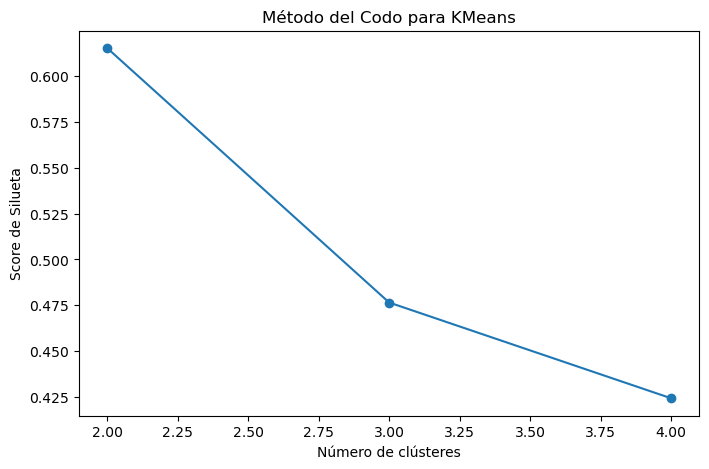

In [25]:
#Se crea una lista vacía, que guardará cada uno de los scores de los modelos.
cost = []

#Se crea un loop de 2 a 5, para evaluar los diferentes modelos (con base en el número de clusters)
for k in range(2,5):
    #Se crea el modelo
    kmeans = KMeans().setK(k).setSeed(1).setFeaturesCol("features")
    #Se entrena el modelo.
    model = kmeans.fit(df_preprocesado)
    #Se aplica el modelo.
    predictions = model.transform(df_preprocesado)
    #Se evalúa el modelo y se guarda el score de Silhoutte.
    evaluator = ClusteringEvaluator()
    silhouette = evaluator.evaluate(predictions)
    cost.append(silhouette)

#Se grafica el resultado.
plt.figure(figsize=(8, 5))
plt.plot(range(2, 5), cost, marker='o')
plt.xlabel('Número de clústeres')
plt.ylabel('Score de Silueta')
plt.title('Método del Codo para KMeans')
plt.show()


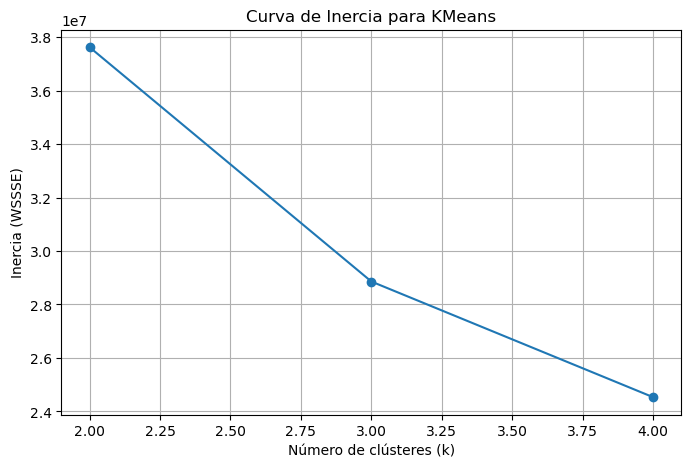

In [26]:
# Lista para almacenar la inercia (WSSSE)
wssse_list = []

# Rango de valores de k a probar
k_values = list(range(2, 5))

for k in k_values:
    kmeans = KMeans().setK(k).setSeed(42).setFeaturesCol("features")
    model = kmeans.fit(df_preprocesado)
    
    # Compute cost (WSSSE)
    wssse = model.summary.trainingCost
    wssse_list.append(wssse)

# Graficar curva de inercia
plt.figure(figsize=(8, 5))
plt.plot(k_values, wssse_list, marker='o')
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Inercia (WSSSE)')
plt.title('Curva de Inercia para KMeans')
plt.grid(True)
plt.show()


## 📊 Comparación de curvas para selección de k en KMeans

Se analizaron dos criterios comunes para determinar el número óptimo de clústeres (`k`) en el modelo KMeans:

---

### 📈 1. Score de Silueta

- El **score de silueta** mide qué tan bien separados y cohesionados están los clústeres.
- En la gráfica evaluada previamente, el valor más alto se obtuvo con **k = 2** (~0.66).
- A medida que aumenta el número de clústeres, el score disminuye, lo que sugiere menor calidad en la separación.

✅ **Conclusión:** El score de silueta sugiere que el valor óptimo es **k = 2**, donde se logra la mayor separación entre grupos.

---

### 📉 2. Curva de Inercia (WSSSE)

- La **inercia** representa la suma de los errores cuadrados dentro de cada clúster.
- Esta métrica siempre disminuye conforme se aumenta `k`, pero el objetivo es identificar un "codo", donde la mejora deja de ser significativa.
- En la gráfica más reciente, la pendiente disminuye claramente después de **k = 3**, lo cual sugiere un punto de quiebre.

✅ **Conclusión:** La curva de inercia sugiere que **k = 3** es un buen compromiso entre simplicidad y reducción de error.

---

### 🧠 Veredicto Final Combinado

| Criterio       | k óptimo sugerido |
|----------------|-------------------|
| **Score de Silueta** | `2` (mayor calidad en separación) |
| **Inercia (WSSSE)**  | `3` (punto de quiebre en mejora de compactación) |

---

### ✅ Recomendación

- Si se busca **máxima cohesión y separación** de clústeres → **usar `k = 2`**.
- Si se desea **más segmentación** con una pérdida aceptable de calidad → **usar `k = 3`**.



### Modelo final KMeans

A continuación se construye y se evalúa el modelo con 2 clústeres (ya que el objetivo es obtener una mejor separación de la severidad de los accidentes), de forma individual.

In [27]:
#Se crea el modelo con 2 clústeres.
kmeans = KMeans().setK(2).setSeed(42).setFeaturesCol("features")

#Se entrena el modelo
modelo_kmeans = kmeans.fit(df_preprocesado)

#Se aplica el modelo
predicciones = modelo_kmeans.transform(df_preprocesado)

#Se evalúa el modelo, con base en el score de Silhoutte
evaluator = ClusteringEvaluator()
silhouette = evaluator.evaluate(predicciones)

print(f"Score de silueta para k=2: {silhouette:.4f}")

#Se muestran las predicciones realizadas.
predicciones.select("prediction").groupBy("prediction").count().show()

Score de silueta para k=2: 0.6153


+----------+-----+
|prediction|count|
+----------+-----+
|         1|60448|
|         0|39552|
+----------+-----+



In [28]:
#Se muestra el valor real vs la predicción hecha por el modelo.
predicciones.groupBy("severity","prediction").count().show()

+--------+----------+-----+
|severity|prediction|count|
+--------+----------+-----+
|       2|         1|46742|
|       2|         0|23258|
|       3|         1|13706|
|       3|         0|16294|
+--------+----------+-----+



### Conclusiones KMeans

El silhoutte score, para 2 clústeres, nos muestra que efectivamente no se están separando de buena forma los conjuntos de datos, por lo que es muy probable una mala clasificación de la severidad de los accidentes; así como en Random Forest, será nuestra obligación decidir si esto satisface nuestro objetivo o si es necesario incorporar (o quitar) más variables en nuestro problema.